# Artificial Neural Networks
<hr>

- Activation function, simple OR function
- Different weight to calculate weights
- What Batch sizes and Epochs are

## What is Artificial Neural Network
- Computing system simulating biological neural networks that constitutes the brains.
- Often called Neural Network

### First Neural Network
- $h(x_1,x_2) = w_0 + w_1x_1 + w_2x_2$

![neural](./images/neural.PNG)

### With activation function
- Step function: $g(x) = 1$ if $x \geq 0$, else $0$
- Rectified linear unit (ReLU): $g(x) = \max(0, x)$
- Sigmoid activation function: sigmoid$(x) = 1 / (1 + \exp(-x))$

**N.B:**
- the circles are called Nodes
- Activation function $w_0 + w_1x_1 + w_2x_2$
- The goal is to determine the weight $w_1, w_2$ (represented as 1 in the figure)

### Model the OR function
- or$(x_1, x_2) = 0$ if $x_1$ and $x_2$ are $0$, else $1$

![ORfunc](./images/neural2.PNG)

### Neural Network
![neural](./images/neural3.PNG)

## How to calculate weight
<hr>

### Gradient Descent
- Gradient descent: tends to calculate the direction of weight
- Calculate the weight
- Algorithm for minimizing the loss when training neural network

**Pseudo Algorithm**

- Start with a random choice of weight
- Repeat:
    - Calculate the gradient based on **all data points** direction that will lead to decreasing loss
    - Update weights according to the gradient

**Tradeoff**
- Difficult to calculate for all data points

<hr>

### Stocastic Gradient Descent
**Pseudo algorithm**
- Start with a random choice of weights
- Repeat:
    - Calculate the gradient based on **one data point** direction that will lead to decreasing loss
    - Update weights according to the gradient
    
<hr>
    
### Mini-Batch Gradient Descent
**Pseudo algorithm**
- Start with a random choice of weights
- Repeat:
    - Calculate the gradient based on **one small batch of data ponits** direction that will lead to decreasing loss
    - Update wieghts accorinding to the gradient

### Perceptron
- Only capable of learning linearly separable decision boundary.
- It cannot model the XOR function (we need multi-layer perceptrons (multi-layer neural network))
- It can take multiple inputs and map linearly to one output with an activation function.

In [3]:
#!pip install tensorflow

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

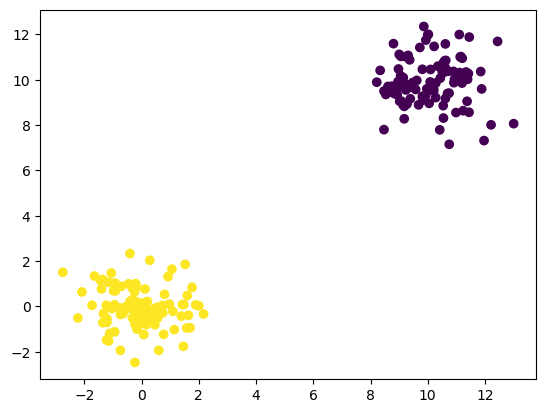

In [6]:
data = np.random.randn(200,3)
data[:100, :2] += (10,10)
data[:100, 2] = 0
data[100:,2] = 1

fig, ax = plt.subplots()
ax.scatter(x=data[:,0], y=data[:,1],c=data[:,2])

In [7]:
X = data[:,:2]
y = data[:,2]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

### Batch size  and Epoch 
Understand how to correctly utilize Keras fit():
- **Batch size**: a set of N samples.
- **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset".

In [9]:
model = Sequential()

In [10]:
model.add(Dense(1, input_dim=2,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,epochs=1000,batch_size=32,verbose=0)

In [12]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.0262 - accuracy: 1.0000


[0.02624194696545601, 1.0]

7/7 [==============================] - 0s 2ms/step


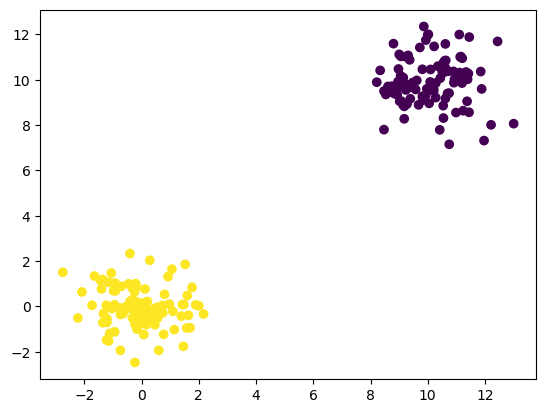

In [16]:
y_pred = model.predict(X)
y_pred = np.where(y_pred < 0.5, 0, 1)

fig, ax = plt.subplots()
ax.scatter(x=X[:,0],y=X[:,1], c=y_pred)

313/313 [==============================] - 0s 1ms/step


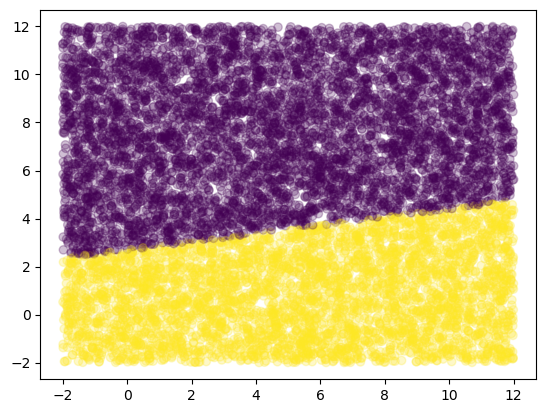

In [20]:
X_full = np.random.rand(10000,2)
X_full = X_full*(14,14)+(-2,-2)

y_full = model.predict(X_full)
y_full = np.where(y_full < .5, 0, 1)

fig, ax = plt.subplots()
ax.scatter(x=X_full[:,0], y=X_full[:,1], c=y_full, alpha=.25)